# Предобработка данных

$f(x) = \frac{1}{3} + \sin(x) \cdot cos^2(x) $

# Работа с пропусками. Объединение датафреймов.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Проверка дубликатов и их удаление

In [ ]:
df = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10', '1'],
    'B': ['ab', 'c', 'bc', 'ab', 'efd', 'ab'],
    'C': [4, 4, 3.5, 15, 5, 4]})

df

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
3,7,ab,15.0
4,10,efd,5.0
5,1,ab,4.0


In [ ]:
df.shape

(6, 3)

In [ ]:
df.shape[0]

6

In [ ]:
len(df)

6

In [ ]:
len([1, 2, 3, 4])

4

In [ ]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

,0
A,object
B,object
C,float64


In [ ]:
type(df['A'][0])

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      object 
 1   B       6 non-null      object 
 2   C       6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


In [ ]:
df['A'] = df['A'].astype('int')
#df['B'] = df['B'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      int64  
 1   B       6 non-null      object 
 2   C       6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 276.0+ bytes


In [ ]:
df.describe()

,A,C
count,6.000000,6.000000
mean,4.166667,5.916667
std,3.656045,4.476792
min,1.000000,3.500000
25%,1.250000,4.000000
50%,3.000000,4.000000
75%,6.250000,4.750000
max,10.000000,15.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,True


In [ ]:
df.duplicated(subset = ['B', 'C'])

,0
0,False
1,False
2,False
3,False
4,False
5,True


In [ ]:
df.duplicated(subset = ['B', 'C']).sum()/len(df)

np.float64(0.16666666666666666)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
3,7,ab,15.0
4,10,efd,5.0


Если нужно удалить дубликаты по заданному набору полей, то есть параметр subset, в котором указывается по каким полям удалять дубликаты.

In [ ]:
df.drop_duplicates(subset=['B'])

,A,B,C
0,1,ab,4.0
1,2,c,4.0
2,4,bc,3.5
4,10,efd,5.0


In [ ]:
df = pd.read_csv('netflix_titles.csv', sep = ',')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.sample(5, random_state = 123)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6426,s6427,TV Show,Case Closed,NaN,"Minami Takayama, Alison Retzloff, Wakana Yamaz...",Japan,"January 4, 2019",2015,TV-14,1 Season,"Anime Series, Crime TV Shows, TV Thrillers","Turned into a young boy by a sinister potion, ..."
5909,s5910,Movie,The Perfect Dictatorship,Luis Estrada,"Damián Alcázar, Alfonso Herrera, Joaquín Cosio...",Mexico,"June 1, 2015",2014,TV-MA,143 min,"Comedies, Dramas, International Movies","After accepting a colossal bribe, a powerful T..."
8000,s8001,Movie,She Did That,NaN,"Luvvie Ajayi, Renae Bluitt, Melissa Butler, Li...",United States,"February 4, 2020",2019,TV-PG,71 min,Documentaries,"Go inside the lives of extraordinary, black fe..."
4543,s4544,Movie,Monty Python Conquers America,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",NaN,"October 2, 2018",2008,TV-MA,55 min,Documentaries,Follow the evolution of the British sketch com...
2952,s2953,Movie,Tom Papa: You're Doing Great!,Gregory Jacobs,Tom Papa,United States,"February 4, 2020",2020,TV-14,60 min,Stand-Up Comedy,"Comedian Tom Papa takes on body image issues, ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['type'].value_counts(normalize = True)

,proportion
type,
Movie,0.696151
TV Show,0.303849


In [ ]:
df['title'].value_counts()

,count
title,
Zubaan,1
Dick Johnson Is Dead,1
Blood & Water,1
Ganglands,1
Jailbirds New Orleans,1
...,...
Bangkok Breaking,1
"Vendetta: Truth, Lies and The Mafia",1
The Starling,1


In [ ]:
df['director'] = df['director'].str.lower()

In [ ]:
df['director'].value_counts().head(20)

,count
director,
rajiv chilaka,19
"raúl campos, jan suter",18
suhas kadav,16
marcus raboy,16
jay karas,14
cathy garcia-molina,13
martin scorsese,12
youssef chahine,12
jay chapman,12


In [ ]:
('rajiv chilaka' in 'raúl campos, jan suter') and ('raúl campos' in 'raúl campos, jan suter')

False

In [ ]:
df['director'] = df['director'].astype('category')

In [ ]:
def well_known_director(row):
    if ('rajiv chilaka' in row) or ('raúl campos' in row) or ('jan suters' in row) or ('suhas kadav' in row) or ('marcus raboy' in row):
        return 'well-known director'
    else:
        return 'NON well-known director'



In [ ]:
df['famouse_director'] = df['director'].apply(well_known_director)

In [ ]:
df['famouse_director'].fillna('NON well-known director').value_counts()

,count
famouse_director,
NON well-known director,8733
well-known director,74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   show_id           8807 non-null   object  
 1   type              8807 non-null   object  
 2   title             8807 non-null   object  
 3   director          6173 non-null   category
 4   cast              7982 non-null   object  
 5   country           7976 non-null   object  
 6   date_added        8797 non-null   object  
 7   release_year      8807 non-null   int64   
 8   rating            8803 non-null   object  
 9   duration          8804 non-null   object  
 10  listed_in         8807 non-null   object  
 11  description       8807 non-null   object  
 12  famouse_director  6173 non-null   object  
dtypes: category(1), int64(1), object(11)
memory usage: 1007.4+ KB


In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['cast'].value_counts()

,count
cast,
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
"Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath",6
...,...
"Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuka Akpotha, Chioma Omeruah, Chiwetalu Agu, Dele Odule, Femi Adebayo, Bayray McNwizu, Biodun Stephen",1
"Neeraj Kabi, Geetanjali Kulkarni, Danish Husain, Sheeba Chaddha, Paras Priyadarshan, Anshul Chauhan, Anud Singh Dhaka, Shirin Sewani, Mihir Ahuja, Vasundhara Rajput",1
"Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasini Mulay",1


In [ ]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


In [ ]:
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"February 2, 2017",1
"September 11, 2019",1
"May 17, 2015",1


In [ ]:
'January 1, 2020 '.split(',')

['January 1', ' 2020 ']

In [ ]:
'January 1, 2020 '.split(',')[0]

'January 1'

In [ ]:
'January 1, 2020 '.split(',')[0].split()[-1]

'1'

In [ ]:
def to_date(row):
    row_month = 'no'
    row = str(row)
    if 'January' in row:
        row_month = '01'
    if 'February' in row:
        row_month = '02'
    if 'March' in row:
        row_month = '03'
    if 'Aprill' in row:
        row_month = '04'
    if 'May' in row:
        row_month = '05'
    if 'June' in row:
        row_month = '06'
    if 'July' in row:
        row_month = '07'
    if 'August' in row:
        row_month = '08'
    if 'September' in row:
        row_month = '09'
    if 'October' in row:
        row_month = '10'
    if 'November' in row:
        row_month = '11'
    if 'December' in row:
        row_month = '12'

    row_day = row.split(',')[0].split()[-1]

    row_year = row.split(' ')[-1]

    row_date = row_year + '-' + row_month + '-' + row_day

    return row_date

In [ ]:
df['date_added'] = df['date_added'].apply(to_date)

In [ ]:
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-1
8804,2019-11-1
8805,2020-01-11


In [ ]:
df['show_id'] = df['show_id'].astype('category')
df['type'] = df['type'].astype('category')
df['title'] = df['title'].astype('category')
df['country'] = df['country'].astype('category')
df['release_year'] = df['release_year'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   show_id           8807 non-null   category
 1   type              8807 non-null   category
 2   title             8807 non-null   category
 3   director          6173 non-null   category
 4   cast              7982 non-null   object  
 5   country           7976 non-null   category
 6   date_added        8807 non-null   object  
 7   release_year      8807 non-null   int32   
 8   rating            8803 non-null   object  
 9   duration          8804 non-null   object  
 10  listed_in         8807 non-null   object  
 11  description       8807 non-null   object  
 12  famouse_director  6173 non-null   object  
dtypes: category(5), int32(1), object(7)
memory usage: 1.4+ MB


In [ ]:
df.drop(columns = ['show_id']);

## Удаление столбцов и строк. Отсутствующие значения.

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, np.nan, np.nan]})
df

,A,B,C
0,1,4,7.0
1,2,5,NaN
2,3,6,NaN


Проверка на NaN-ы:

In [ ]:
df.isna()

,A,B,C
0,False,False,False
1,False,False,True
2,False,False,True


In [ ]:
df.isna().sum()

,0
A,0
B,0
C,2


In [ ]:
print(df.isna().sum() / len(df))
print(df.isna().sum() / df.shape[0])

A    0.000000
B    0.000000
C    0.666667
dtype: float64
A    0.000000
B    0.000000
C    0.666667
dtype: float64


Удалять строки и столбцы с пустыми значениями можно с помощью функции `dropna`. Обратите внимание, что применение функции без присваивания создает новый объект, а не меняет *df*.

In [ ]:
df = df.dropna()

In [ ]:
df

,A,B,C
0,1,4,7.0


Как и у многих других функций библиотек `numpy` и `pandas` есть аргумент `axis`, который отвечает за выбор: просмотр строк или просмотр столбцов:

In [ ]:
df

,A,B,C
0,1,4,7.0


In [ ]:
df.dropna(axis = 0)

,A,B,C
0,1,4,7.0


In [ ]:
df.dropna(axis = 1)

,A,B
0,1,4
1,2,5
2,3,6


Пропущенные значения можно не только удалить, но и заполнить:

In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


Заполнить можно значением:

In [ ]:
df.fillna(value=0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


Словарем значений:

In [ ]:
values = {"A": 0, "B": 1, "C": 2, "D": 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0.0
1,3.0,4.0,2.0,1.0
2,0.0,1.0,2.0,3.0
3,0.0,3.0,2.0,4.0


Методом заполнения вперед:

In [ ]:
df.fillna(method="ffill")

/tmp/ipython-input-3944122520.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


Методом заполенения назад:

In [ ]:
df.fillna(method="bfill")

/tmp/ipython-input-3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


И, конечно, нужно уметь удалять ненужные столбцы. Для этого есть функция `drop`. Здесь мы уже не обращаем внимание на наличие или отсутствие пустых значений. Параметрами подаются список названий колонок для удаления, и часто указывается `axis=1`, т.к. по умолчанию считается axis=0, в этом случае поиск будет по индексам строк.

In [ ]:
df.drop(["C"], axis = 1)

,A,B,D
0,NaN,2.0,0.0
1,3.0,4.0,1.0
2,NaN,NaN,NaN
3,NaN,3.0,4.0


In [ ]:
df.fillna(method="bfill").drop(["A", "C"], axis = 1)

/tmp/ipython-input-191760694.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill").drop(["A", "C"], axis = 1)


,B,D
0,2.0,0.0
1,4.0,1.0
2,3.0,4.0
3,3.0,4.0


Функция `drop` также не изменяет исходный объект, а создает новый. Для изменения исходного объекта нужно присвоить ему этот результат:

In [ ]:
df = df.fillna(method="bfill").drop(["A", "C"], axis = 1)

/tmp/ipython-input-330342657.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").drop(["A", "C"], axis = 1)


In [ ]:
df

,B,D
0,2.0,0.0
1,4.0,1.0
2,3.0,4.0
3,3.0,4.0


Еще пара способов:

In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [ ]:
df.mean()

,0
A,3.000000
B,3.000000
C,NaN
D,1.666667


In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,3.0,2.0,NaN,0.000000
1,3.0,4.0,NaN,1.000000
2,3.0,3.0,NaN,1.666667
3,3.0,3.0,NaN,4.000000


In [ ]:
df.fillna(df.min())

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,2.0,NaN,0.0
3,3.0,3.0,NaN,4.0


In [ ]:
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [ ]:
df.min()

,0
A,3.0
B,2.0
C,NaN
D,0.0


In [ ]:
df.fillna(df.min())

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,2.0,NaN,0.0
3,3.0,3.0,NaN,4.0


In [ ]:
df.max().min()

3.0

In [ ]:
df.fillna(df.min())

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,2.0,NaN,0.0
3,3.0,3.0,NaN,4.0


In [ ]:
df.fillna(df.min()).fillna(df.max().min())

,A,B,C,D
0,3.0,2.0,3.0,0.0
1,3.0,4.0,3.0,1.0
2,3.0,2.0,3.0,0.0
3,3.0,3.0,3.0,4.0


In [ ]:
df.max()

,0
A,3.0
B,4.0
C,NaN
D,4.0


In [ ]:
df.max().min()

3.0

**Упражнение 1.** Объясните, как работает ячейка выше.

**Упражнение 2.** Дан датафрейм в ячейке ниже, состоящий из 4 единиц на диагонали и nan-ов. Заполнить его так, чтобы в нем было 8 единиц и 8 двоек. Использовать только `fillna`.

In [ ]:
df = pd.DataFrame([[1, np.nan, np.nan, np.nan],
                   [np.nan, 1, np.nan, np.nan],
                   [np.nan, np.nan, 1, np.nan],
                   [np.nan, np.nan, np.nan, 1]],
                columns=list("ABCD"))
df

,A,B,C,D
0,1.0,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,1.0


In [ ]:
df[1:2] = df[1:2].fillna(1)
df

,A,B,C,D
0,1.0,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0
2,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,1.0


**Упражнение 3.** Из полученного датафрейма удалить столбец (или столбцы) с минимальной суммой значений.

In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Gender       418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


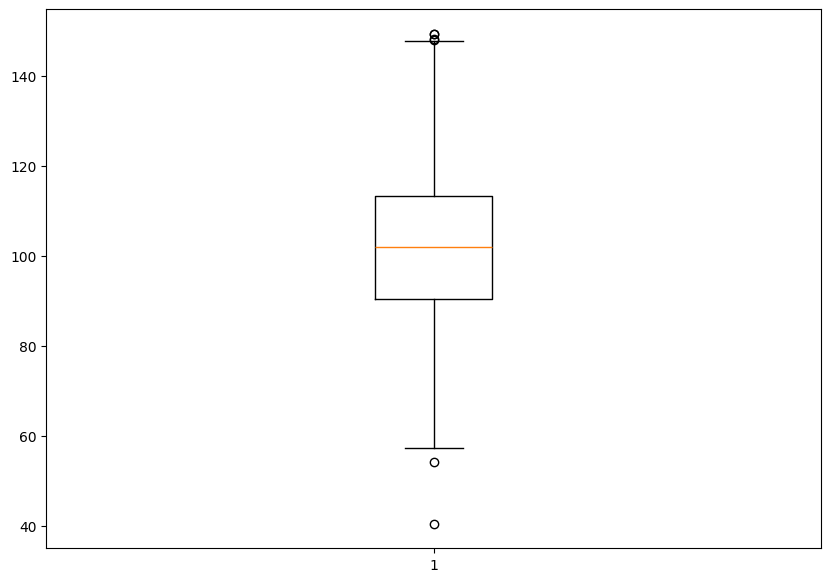

In [ ]:
np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(10, 7))

plt.boxplot(data)
plt.show()

In [ ]:
df['Fare'].value_counts().index

Index([   7.75,    26.0,    8.05,    13.0,  7.8958,    10.5,   7.775,   7.225,
        7.2292,    21.0,
       ...
        12.875,  21.075,    39.4,   20.25,    47.1, 13.8625,  7.7208,    90.0,
         108.9, 22.3583],
      dtype='float64', name='Fare', length=169)

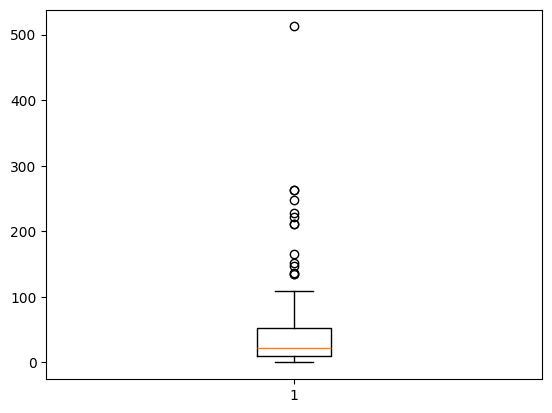

In [ ]:
plt.boxplot(df['Fare'].value_counts().index)
plt.show()

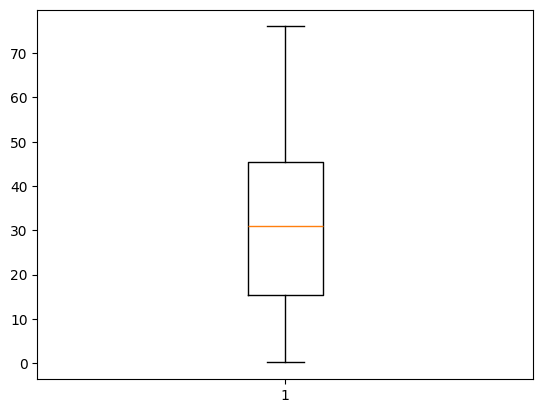

In [ ]:
plt.boxplot(df['Age'].value_counts().index)
plt.show()

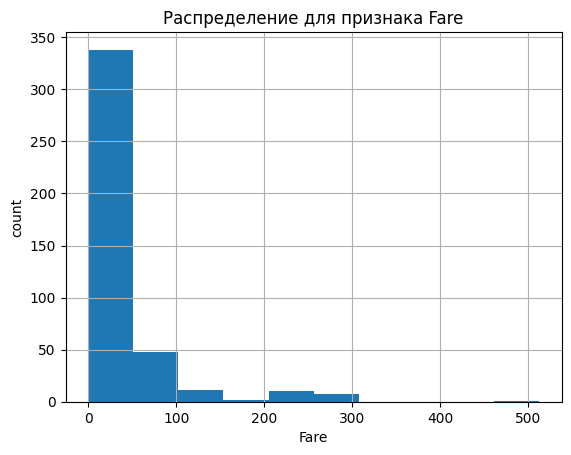

In [ ]:
df['Fare'].hist()
plt.title('Распределение для признака Fare')
plt.xlabel('Fare')
plt.ylabel('count');

## Объединение датафреймов

В pandas для объединения датафреймов есть три метода pd.concat(), merge() и join(). Подробнее о них можно посмотреть: https://newtechaudit.ru/pandas-merge-join-concatenate/

**Упражнение 4.** Найдите средний возраст пассажиров

**Упражнение 5.** Выведите имя самого молодого пассажира.

**Упражнение 6.** Посчитайте доли пассажиров по классам обслуживания (Pclass)

**Упражнение 7.** Найдите средние возраста пассажиров по классам обслуживания.

**Упражнение 8.** Удалите столбец с наибольшим числом пропусков.

**Упражнение 9.** Удалите столбцы с наибольшим числом уникальных значений.

**Упражнение 10.** Найдите доли выживших среди мужчин, среди женщин и среди всех пассажиров.

**Упражнение 11.** Найдите доли выживших по классам обслуживания.

**Упражнение 12.** Найдите доли выживших среди возрастных категорий 18-, 18-60, 60+.

**Упражнение 13.** Любым из рассмотренных методов реализуйте left join, right join, inner join, outer join датафреймов df1 и df2 (объединение по полю A).

In [ ]:
df1 = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10'],
    'B': ['ab', 'c', 'bc', 'ab', 'efd'],
    'C': [4, 4, 3.5, 15, 5]})

df2 = pd.DataFrame({
    'A': ['1', '2', '4', '7', '10'],
    'F': ['n22', 'c1', 'b8', 'a589', 'b95'],
    'D': [100, 400, 30, 150, 50]})